# **IMT - Instituto Mauá de Tecnologia**
## Pós-Graduação em Ciência de Dados e Inteligência Artificial

# **Big Data - Estudo do Dataset "Mapa da Felicidade"**

<br> Por [Gabriel Lima](http://https://github.com/GabrielLima1995),  [Giovanni Schiffini](https://github.com/schiffini) e Rafael Brayner Costa. <h1>

**INTRODUÇÃO**

Em 2011 a Organização das Nações Unidas (ONU) aprovou uma resolução que reconhece a busca pela felicidade como "um objetivo humano fundamental" e convida os estados-membros a promover políticas públicas que incluam a importância da felicidade e do bem-estar em sua aposta pelo desenvolvimento. Essencialmente, essa é a justificativa de toda e qualquer política pública.

A resolução da ONU recebeu o título "A Felicidade: para um Enfoque Holístico do Desenvolvimento" e reconhece que a felicidade é "um objetivo e uma aspiração universal" e que também é "a manifestação do espírito dos Objetivos de Desenvolvimento do Milênio" (ODM). Os 193 países-membros da ONU foram convidados para empreenderem "a elaboração de novas medidas que reflitam melhor a importância deste objetivo em suas políticas públicas".

O primeiro Relatório de Felicidade Mundial foi lançado em 1º de abril de 2012 como um texto fundamental para a reunião da ONU: Bem-estar e Felicidade: Definindo um Novo Paradigma Econômico, atraindo a atenção internacional. O relatório delineou o estado de felicidade mundial, as causas da felicidade e da miséria e as implicações políticas destacadas por estudos de caso. Em 2013, o segundo Relatório de Felicidade Mundial foi publicado e, desde então, tem sido publicado anualmente, com exceção de 2014. O relatório usa principalmente dados da Pesquisa Mundial Gallup. Cada relatório anual está disponível ao público para download no site World Happiness Report.

**OBJETIVO GERAL**

- Apresentar os melhores países dentro do cada segmento;
- Comparar o Brasil com alguns países da América do Norte e Europa.




**OBJETIVO ESPECÍFICO**

- Apresentar técnicas de processamento em Python voltadas para Big Data: Pandas, NumPy, Seaborn e MatPlotLib.

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Destacando os valores máximos de cada atributo no dataset

In [2]:
df=pd.read_csv('/content/2019.csv')
df.head()
original=df.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


In [3]:
df.shape

(156, 9)

Descobrir atributos altamente correlacionados entre si por meio do mapa de calor.

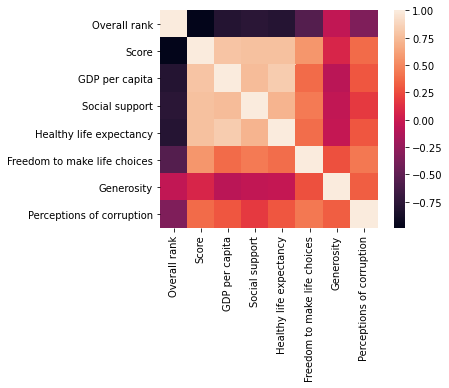

In [4]:
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

Notam-se algumas correlações interessantes, como a alta relação entre a expectativa de vida e o PIB per capita, e a baixa relação entre a Generosidade e os indicadores sociais.

Traçando relacionamentos de pares no dataset

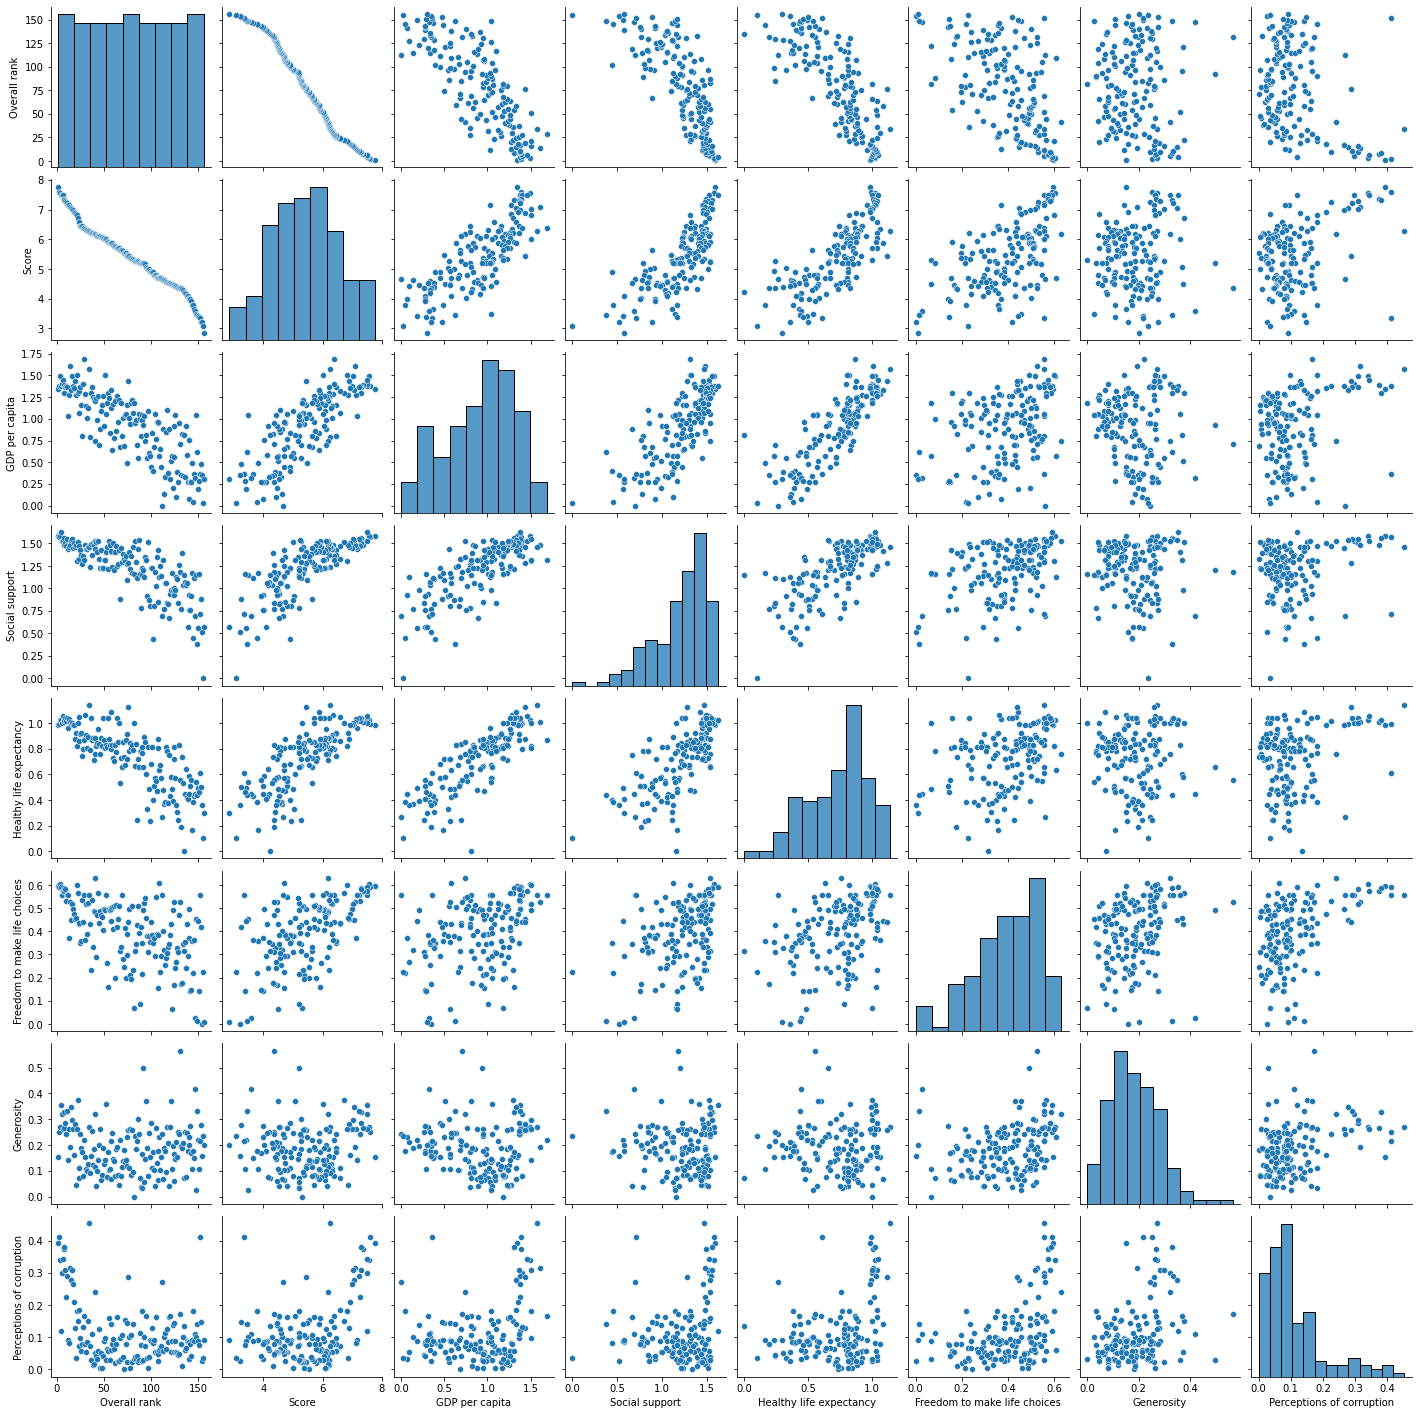

In [5]:
sns.pairplot(df)

Segue abaixo a apresentação dos 10 principais países para cada atributo definido no mapa da felicidade


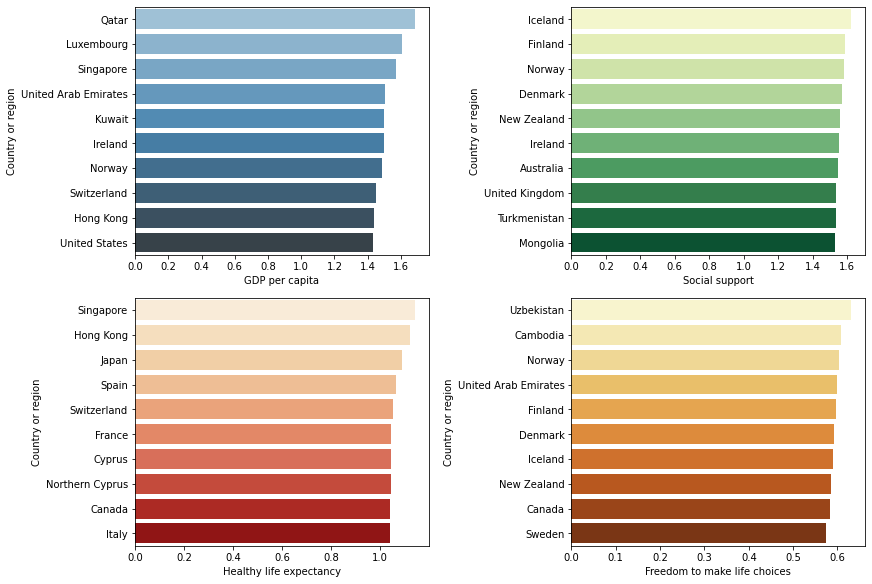

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

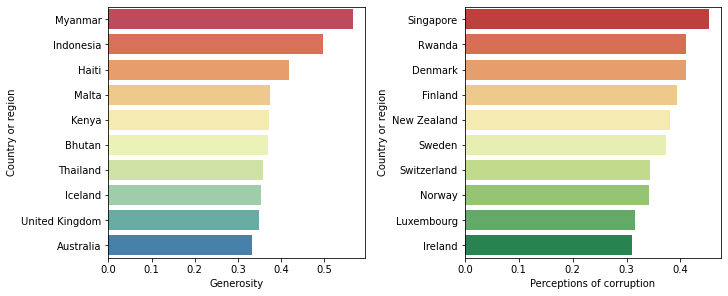

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

Agora nós vamos atribuir a cada país uma categoria como Alta, Média e Baixa, de acordo com suas pontuações de felicidade. Portanto, temos que descobrir o limite em que essas categorias se enquadrarão.

In [8]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.769
min: 2.853
range difference: 1.639


In [9]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


Podemos observar acima que o "score", o principal método de medição da felicidade, possui faixas bem definidas entre "baixo", "médio" e "alto". Desta forma, podemos classificar os países conforme seu desempenho neste dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Para finalizar essa etapa nós adicionamos uma nova categoria de coluna ao conjunto de dados e distribuindo os níveis Alto, Baixo, Médio

In [12]:
cat=[]
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat 

Também definiremos o conjunto de dados como uma zona verde e uma zona vermelha. Se o país pertence à categoria Alta, então ele está sob a zona verde e se estiver na categoria Média ou Baixa, será a zona vermelha

In [13]:

color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,High
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,High
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,High
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,High
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,High
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,High
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,High
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,High
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,High
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,High


Na sequência, observaremos a classificação do Brasil e compararemos com alguns países da América do Norte e Europa.

In [15]:
df.loc[df['Country or region']=='Brazil']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
31,32,Brazil,6.3,1.004,1.439,0.802,0.39,0.099,0.086,High


O Brasil apresenta índices interessantes, está posicionado na categoria High, porém ainda há avanços econômicos, sociais e políticos que podem ser obtidos. Vamos visulizar outros países para ter uma comparação mais assertiva sobre a posição do Brasil neste mapa.

In [16]:
df.loc[df['Country or region']=='United States']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128,High


In [17]:
df.loc[df['Country or region']=='United Kingdom']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.45,0.348,0.278,High


In [18]:
df.loc[df['Country or region']=='Canada']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,High


Os três países acima estão posicionados na categoria High com um destaque especial para o Canadá que apresenta um excelente índice na categoria felicidade. Aparentemente o Brasil não está tão distante dos outros países, mas vamos fazer uma comparação direta para ter uma melhor visualização dos números.

Abaixo um comparativo entre países apresentando o PIB, Suporte Social, a Expectativa de vida, Liberdade para fazer escolhas na vida, Generosidade e Percepção da corrupção.
O que chama mais atenção é que esperavamos melhores números na questão do suporte social e também generosidade. Na questão do Suporte Sociais, os números são bem próximos dos índices dos EUA, porém muito abaixo dos outros países. Já na questão da Generosidade, que é a qualidade de ser generoso ou gentil, o Brasil apresenta números muito abaixo comparado aos três países apresentados.


In [20]:
d= df[(df['Country or region'].isin(['Brazil','Canada','United Kingdom', 'United States']))]
d

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,High
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,High
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,High
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086,High


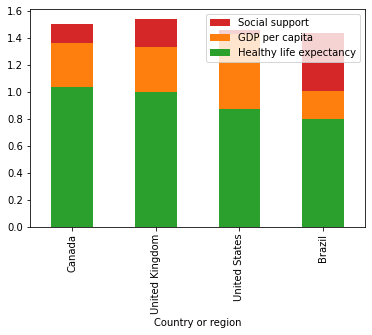

In [21]:

ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()


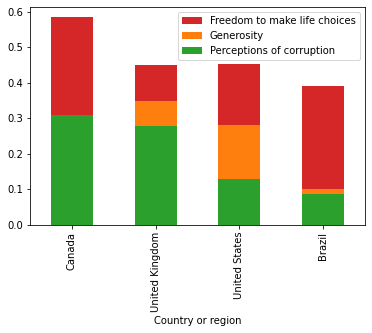

In [22]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()

Para finalizar esse estudo, nós apresentamos abaixo um mapa global da felicidade de acordo com a categoria de intensidade de cada país.

In [23]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)